In [1]:
import pandas as pd

In [2]:
# Load data

df_housing = pd.read_csv(filepath_or_buffer="../data/housing.csv", sep=",")

In [3]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

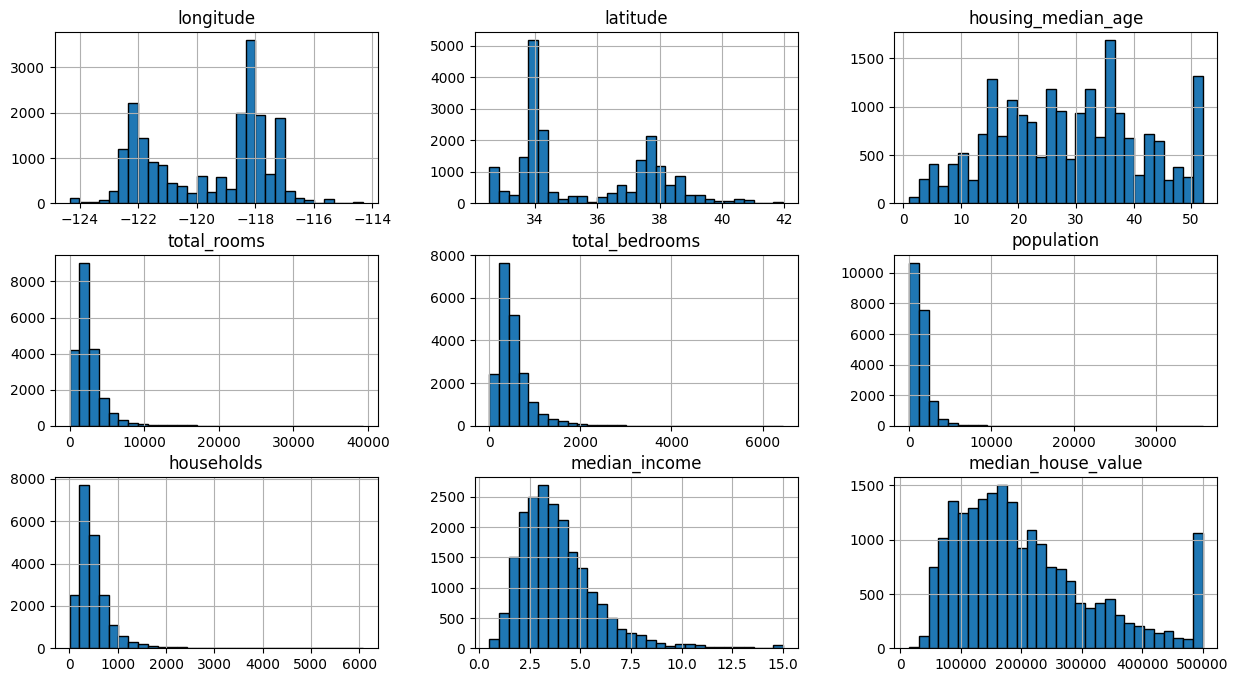

In [6]:
df_housing.hist(figsize=(15,8), bins=30, edgecolor="black")

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

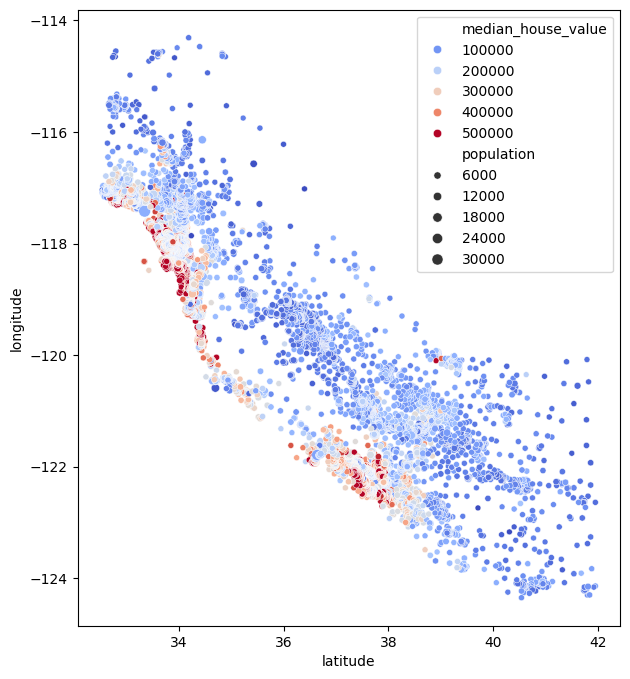

In [8]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=df_housing,
                x="latitude",
                y="longitude",
                hue="median_house_value",
                palette="coolwarm",
                size="population")
plt.show()

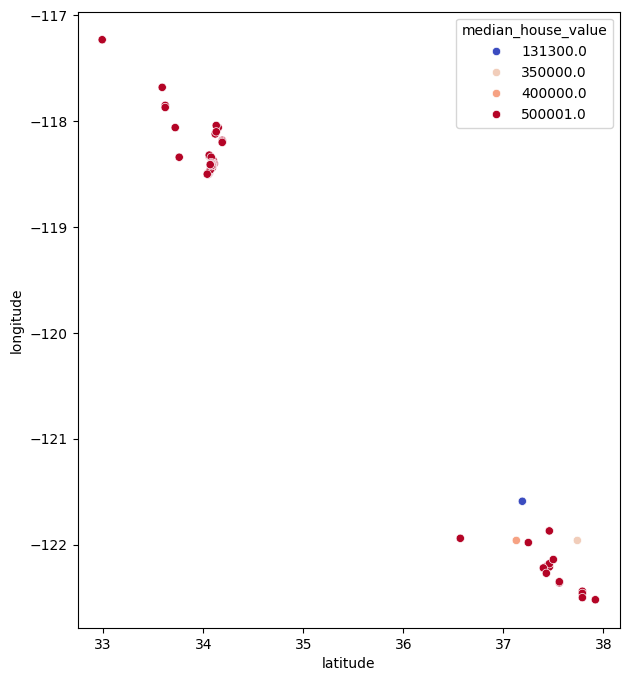

In [9]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=df_housing[(df_housing.median_income > 14)],
                x="latitude",
                y="longitude",
                hue="median_house_value",
                palette="coolwarm")
plt.show()

In [10]:
# Check null data
print(df_housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


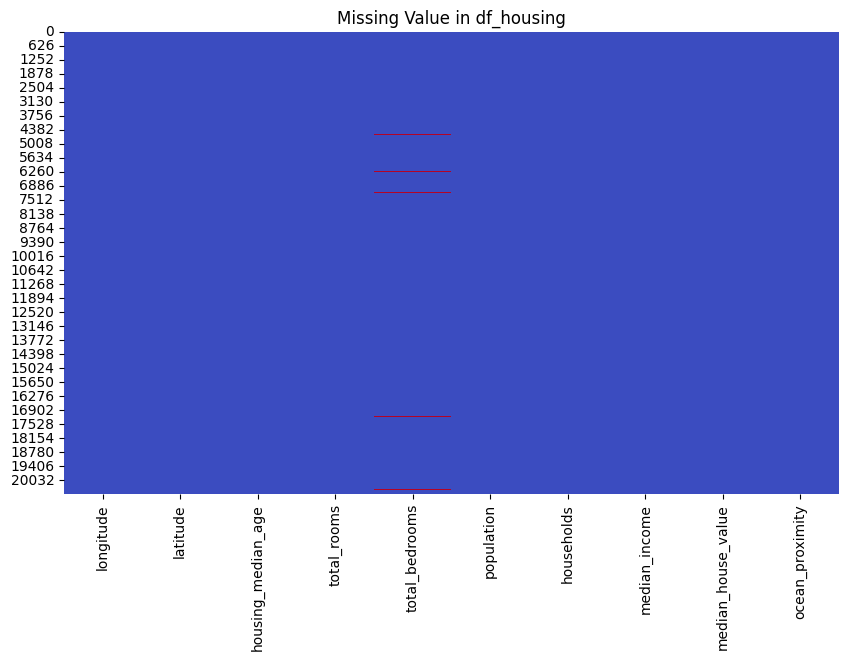

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_housing.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Value in df_housing")
plt.show()

In [12]:
# Drop na data

df_housing = df_housing.dropna()


In [13]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
# Convert categorial data to numerical

# Count data
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [15]:
# Dummies / One hot Encoding

dummies = pd.get_dummies(df_housing["ocean_proximity"], dtype=int)

In [16]:
# join original df with dommies

df_housing = df_housing.join(dummies)

In [17]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [18]:
# Remove ocean proximity column

df_housing = df_housing.drop(["ocean_proximity"], axis=1)

In [19]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [20]:
# Correlation

corr_matriz = df_housing.corr()

<Axes: >

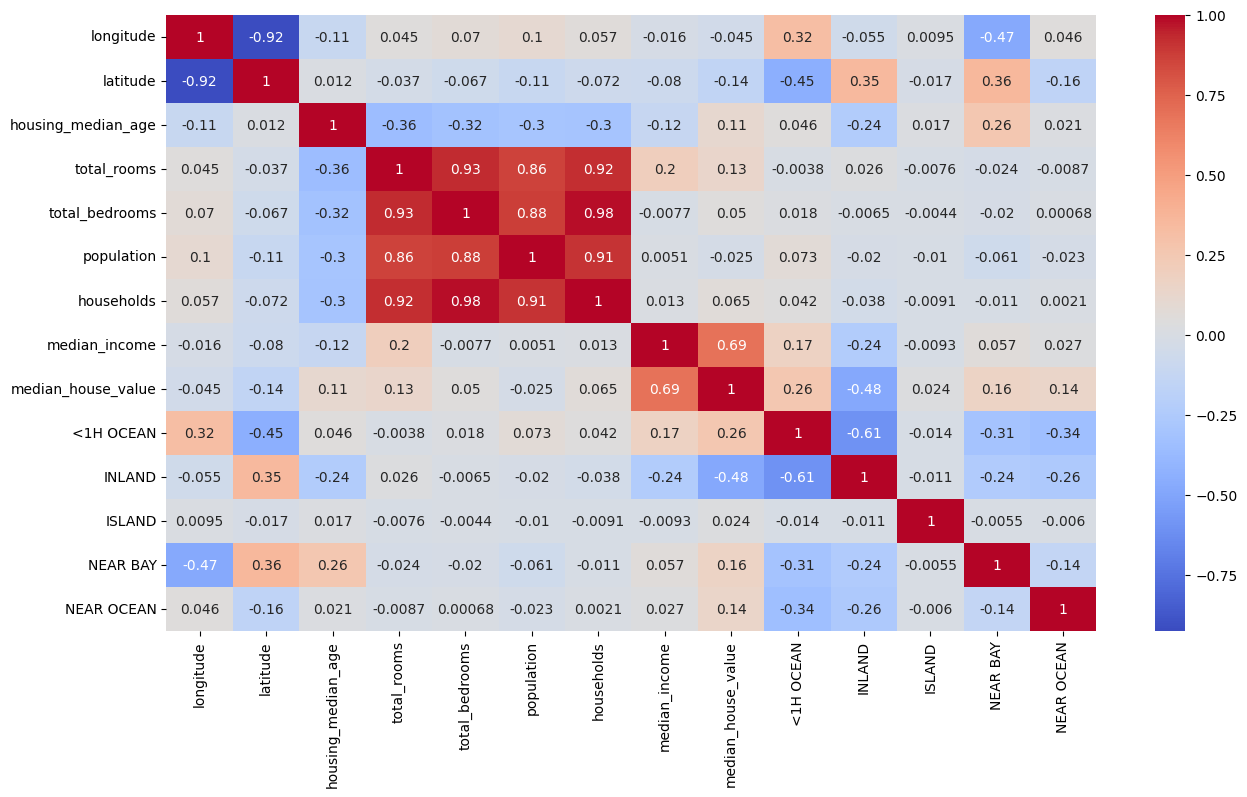

In [21]:
# Heatmap chart to identify correlation

plt.figure(figsize=(15, 8))
sns.heatmap(data=corr_matriz, annot=True, cmap="coolwarm")

In [22]:
corr_matriz["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

variables with highest correlation are median_house_value and median_income, remember that we want to predict median_house_value, that is the label.

<Axes: xlabel='median_income', ylabel='median_house_value'>

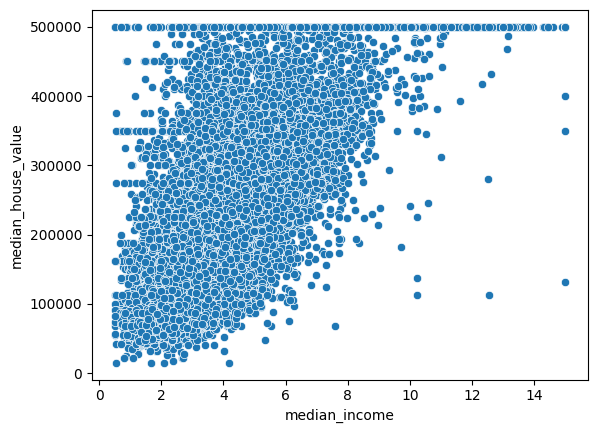

In [23]:
# chart with those variables
sns.scatterplot(x=df_housing["median_income"], y=df_housing["median_house_value"])

In [25]:
# add new feature, a ratio between total room and total bedroom

df_housing["bedroom_ratio"] = df_housing["total_bedrooms"] / df_housing["total_rooms"]

<Axes: >

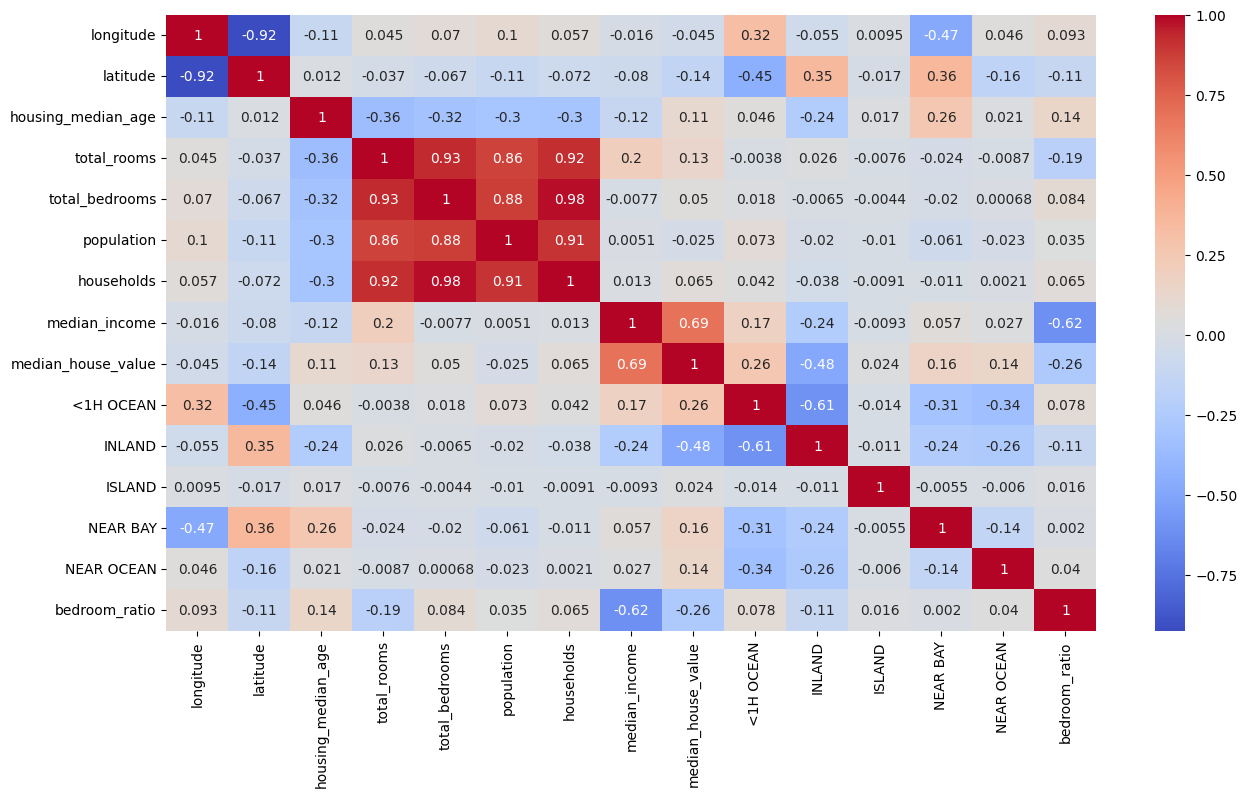

In [26]:
corr_matriz = df_housing.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(data=corr_matriz, annot=True, cmap="coolwarm")

In [28]:
# Split features and label

X = df_housing.drop(['median_house_value'], axis=1)
y = df_housing["median_house_value"]


In [34]:
# Split data in 2 parts: 1) Training set and testing set - 20% for testing

from sklearn.model_selection import train_test_split

# train_test_split outputs 4 elements

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(16346, 14)
(4087, 14)
(16346,)
(4087,)


In [36]:
# Define model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
# Train Model

model.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = model.predict(X_test)

In [48]:
print(prediction)
#output is a numpy array, it should be converted to Pandas Data Series

[180905.10879066 150972.99808657 197421.37822355 ... 203798.4902906
 243372.86293168 251990.38541372]


In [51]:
# Convert to dataframe with header

comparassion = {"prediction": prediction, "real_value": y_test}

pd.DataFrame(comparassion)

,prediction,real_value
3140,180905.108791,111100.0
13439,150972.998087,128300.0
4474,197421.378224,144600.0
3731,266106.078933,237900.0
16397,101012.746774,135000.0
...,...,...
16695,220938.772049,209900.0
5241,430863.211181,500001.0
15486,203798.490291,171400.0
7813,243372.862932,184600.0


In [52]:
## Overfiting or sobreajuste, when model learn data exactly then train data is better than test data

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.6539938977658177
0.6403601269790258


In [54]:
# Error

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, prediction)

In [55]:
# it is a big numer so dificult to understand, then it suggest to check sqrt
mse

4633056565.646967

In [57]:
rmse = np.sqrt(mse)
rmse

#68066 means the amount of error in median_house_value. We should have a less error

np.float64(68066.55981939271)

In [58]:
# Scaler, it is used to scale data, becase ML Model will give more relevant to higher numbers than Scaler compress data in order to have the same distance from min number to max number in all features.

In [60]:
from sklearn.preprocessing import StandardScaler

# Just features data should be scalared

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [62]:
X_test_scaled

array([[ 0.6889449 , -0.34889315, -2.08409013, ..., -0.34822694,
        -0.38097073, -0.46727405],
       [ 1.07493435, -0.71545759, -0.04219755, ..., -0.34822694,
        -0.38097073, -0.80706608],
       [ 0.70398345, -0.72015714,  1.1358174 , ..., -0.34822694,
        -0.38097073,  0.57798509],
       ...,
       [ 1.220307  , -1.16191429, -1.84848714, ..., -0.34822694,
        -0.38097073, -0.1215823 ],
       [ 0.7290477 , -0.80474893,  0.50754276, ..., -0.34822694,
        -0.38097073, -0.38265009],
       [ 1.26040979, -1.42508876, -0.27780054, ..., -0.34822694,
         2.6248736 , -0.72581675]])

In [63]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.688945,-0.348893,-2.084090,-0.234112,-0.342878,-0.402174,-0.406513,0.613213,-0.909396,1.485089,-0.022127,-0.348227,-0.380971,-0.467274
1,1.074934,-0.715458,-0.042198,0.255310,-0.028220,0.241703,0.061340,0.130787,-0.909396,1.485089,-0.022127,-0.348227,-0.380971,-0.807066
2,0.703983,-0.720157,1.135817,-0.494538,-0.368328,-0.079068,-0.371108,-0.360363,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,0.577985
3,0.578662,-0.673162,1.135817,-0.352201,-0.419229,-0.368696,-0.444447,0.435444,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,-0.326666
4,-0.844987,1.122064,-0.591938,-0.978122,-1.073995,-0.979094,-1.117144,-0.521890,-0.909396,1.485089,-0.022127,-0.348227,-0.380971,-0.819384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,-0.529178,-0.226705,-0.199266,0.604641,0.614979,0.274402,0.567127,-0.618081,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,-0.182199
4083,0.588688,-0.701359,0.036337,1.716391,1.098534,0.579601,1.166484,2.309059,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,-0.930240
4084,1.220307,-1.161914,-1.848487,-0.002871,0.004172,-0.093082,0.033522,0.113862,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,-0.121582
4085,0.729048,-0.804749,0.507543,-0.009157,-0.097630,0.019810,-0.072694,0.315863,1.099631,-0.673360,-0.022127,-0.348227,-0.380971,-0.382650


# Improve model


In [64]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
prediction = model.predict(X_test_scaled)

In [66]:
comparassion = {"prediction": prediction, "real_value": y_test}

pd.DataFrame(comparassion)

,prediction,real_value
3140,177980.126657,111100.0
13439,152843.020172,128300.0
4474,196311.210761,144600.0
3731,263131.791315,237900.0
16397,94675.851379,135000.0
...,...,...
16695,222128.594182,209900.0
5241,433347.972181,500001.0
15486,202758.810611,171400.0
7813,243303.282495,184600.0


In [67]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))


0.6539938977658177
0.6471112579523055


In [68]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
rmse

np.float64(67424.66312723604)

Model did not improve, we should understand what is the issue